In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
#first model 

In [3]:
df = pd.read_csv('Advertising1.csv')

In [4]:
df.shape

(200, 5)

In [5]:
d0 = df.dropna()
y = d0.Sales
x = d0.iloc[:,1:3]

In [6]:
x[:5]

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [7]:
train_pct_index = int(0.5*len(x))
X_train, X_test = x[:train_pct_index], x[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [8]:
X_train.shape

(100, 2)

In [9]:
model = LinearRegression().fit(X_train.sort_index(),y_train.sort_index())

In [10]:
model.intercept_,model.coef_

(3.146986251809624, array([0.04585391, 0.18412361]))

In [11]:
b0 = model.intercept_
b1=model.coef_[0]
b2=model.coef_[1]
X_train = X_train.sort_index()
y_train = y_train.sort_index()

In [12]:
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['error'])
    for i in range(len(y_test.index)):
        pos = y_test.index[i]
        est = b0+b1*X_test.TV[pos]+b2*X_test.Radio[pos]
        error = est-y_test[pos]
        writer.writerow([error])


In [13]:
residual_test = []
for i in range(len(y_test.index)):
    pos = y_test.index[i]
    est = b0+b1*X_test.TV[pos]+b2*X_test.Radio[pos]
    error = est-y_test[pos]
    residual_test.append(error)    

In [14]:
residual_test[:5]

[2.4366279726648816,
 -0.37822691248639373,
 3.0549010759514346,
 0.2298625738962521,
 -0.31517185657442326]

In [15]:
residual_train = []
for i in range(len(y_train.index)):
    pos = y_train.index[i]
    est = b0+b1*X_train.TV[pos]+b2*X_train.Radio[pos]
    error = est-y_train[pos]
    residual_train.append(error)    

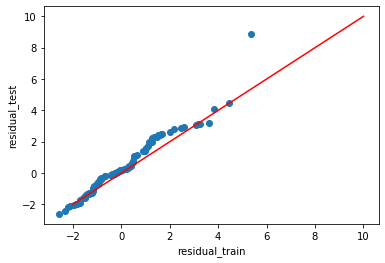

In [16]:
plt.figure()
plt.scatter(np.sort(residual_train), np.sort(residual_test))
plt.xlabel("residual_train")
plt.ylabel("residual_test")
x = np.linspace(-2,10,100)
y=x
plt.plot(x,y,'-r')
plt.show()

In [17]:
#chi sqaure test 2 sample

In [18]:
from scipy import stats

In [19]:
from scipy.stats import chi2_contingency

In [20]:
residual_train = np.array(residual_train)

In [21]:
residual_test = np.array(residual_test)

In [22]:
chi2_contingency(pd.crosstab(residual_train,residual_test))

(9900.000000000004,
 0.23900787924979455,
 9801,
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]]))

In [23]:
#p value is 0.2390078

In [24]:
#calculate r sqaure

In [25]:
from sklearn.metrics import r2_score

In [26]:
ypred = model.predict(X_test)

In [27]:
r2_score(y_test,ypred)

0.8822622227669648

In [28]:
#drop outliers

In [29]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [30]:
outlier_test = detect_outlier(residual_test)
outlier_test

[8.870379012265394]

In [31]:
detect_outlier(residual_train)

[8.870379012265394, 5.349559902483892]

In [32]:
index_test= np.where(residual_test == 8.870379012265394)

In [33]:
index_test

(array([30]),)

In [34]:
index_train= np.where(residual_train == 5.3495599024838905)
index_train

(array([], dtype=int64),)

In [35]:
# Get new dataset N = 99
# validation set drop row 29
# train set drop row 4

In [36]:
#set up new X and Y 
X_newtrain = X_train.drop(X_train.index[5])
X_newtest = X_test.drop(X_test.index[30])
y_newtrain = y_train.drop(y_train.index[5])
y_newtest = y_test.drop(y_test.index[30])

In [37]:
# fit new model

In [38]:
model2 = LinearRegression().fit(X_newtrain.sort_index(),y_newtrain.sort_index())
model2.intercept_,model2.coef_

(3.2079910207355393, array([0.04457953, 0.19154688]))

In [39]:
b00 = model2.intercept_
b11=model2.coef_[0]
b22=model2.coef_[1]
X_newtrain = X_newtrain.sort_index()
y_newtrain = y_newtrain.sort_index()

In [40]:
with open('data1.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['error'])
    for i in range(len(y_newtest.index)):
        pos = y_newtest.index[i]
        est = b00+b11*X_newtest.TV[pos]+b22*X_newtest.Radio[pos]
        error = est-y_newtest[pos]
        writer.writerow([error])

In [41]:
residual_test2 = []
for i in range(len(y_newtest.index)):
    pos = y_newtest.index[i]
    est = b00+b11*X_newtest.TV[pos]+b22*X_newtest.Radio[pos]
    error = est-y_newtest[pos]
    residual_test2.append(error)   

In [42]:
residual_test2[:5]

[2.2461310260139165,
 -0.42548324004875226,
 2.833800016556829,
 0.17909186265681143,
 -0.30310589555568157]

In [43]:
residual_train2 = []
for i in range(len(y_newtrain.index)):
    pos = y_newtrain.index[i]
    est = b00+b11*X_newtrain.TV[pos]+b22*X_newtrain.Radio[pos]
    error = est-y_newtrain[pos]
    residual_train2.append(error)    

In [44]:
residual_train2[:5]

[-1.3937860385741558,
 2.3195727275610754,
 3.466760858914638,
 -0.627323345812453,
 0.4366771295500911]

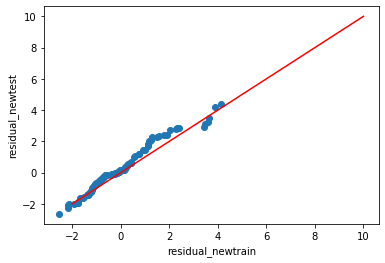

In [45]:
plt.figure()
plt.scatter(np.sort(residual_train2), np.sort(residual_test2))
plt.xlabel("residual_newtrain")
plt.ylabel("residual_newtest")
x = np.linspace(-2,10,100)
y=x
plt.plot(x,y,'-r')
plt.show()

In [46]:
# perfrom chi square test

In [47]:
residual_train2 = np.array(residual_train2)
residual_test2 = np.array(residual_test2)

In [48]:
chi2_contingency(pd.crosstab(residual_train2,residual_test2)) # pvalue is smaller

(9702.0,
 0.23900028080212044,
 9604,
 array([[0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101],
        [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101],
        [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101],
        ...,
        [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101],
        [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101],
        [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101]]))

In [49]:
ypred2 = model2.predict(X_newtest)

In [50]:
r2_score(y_newtest,ypred2)

0.9072059622016705

In [51]:
# third model remove more ouliers
outliers2=[]
def detect_outlier2(data_1):
    
    threshold=1.96
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers2.append(y)
    return outliers2

In [52]:
detect_outlier2(residual_train)

[3.0869473257074524,
 5.349559902483892,
 3.8464125488303047,
 4.431625489665663,
 3.155593302236259,
 3.2681192062475652,
 3.5998933690321637]

In [53]:
#index 2,5,25,35,56,75,78 from train neeed to be removed

In [54]:
#index 2,26,30,31,58,69,78 from test need to be removed

In [55]:
#remove outlier for model3
X_train3 = X_train.drop(X_train.index[[2,5,25,35,56,75,78]])
X_test3 = X_test.drop(X_test.index[[2,26,30,31,58,69,78]])
y_train3 = y_train.drop(y_train.index[[2,5,25,35,56,75,78]])
y_test3 = y_test.drop(y_test.index[[2,26,30,31,58,69,78]])

In [56]:
model3 = LinearRegression().fit(X_train3.sort_index(),y_train3.sort_index())
model3.intercept_,model3.coef_

(3.6557928921639267, array([0.04256215, 0.1954805 ]))

In [57]:
b000 = model3.intercept_
b111=model3.coef_[0]
b222=model3.coef_[1]
X_train3 = X_train3.sort_index()
y_train3 = y_train3.sort_index()

In [58]:
with open('data2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['error'])
    for i in range(len(y_test3.index)):
        pos = y_test3.index[i]
        est = b000+b111*X_test3.TV[pos]+b222*X_test3.Radio[pos]
        error = est-y_test3[pos]
        writer.writerow([error])

In [59]:
residual_test3 = []
for i in range(len(y_test3.index)):
    pos = y_test3.index[i]
    est = b000+b111*X_test3.TV[pos]+b222*X_test3.Radio[pos]
    error = est-y_test3[pos]
    residual_test3.append(error)  

In [60]:
residual_train3 = []
for i in range(len(y_train3.index)):
    pos = y_train3.index[i]
    est = b000+b111*X_train3.TV[pos]+b222*X_train3.Radio[pos]
    error = est-y_train3[pos]
    residual_train3.append(error)  

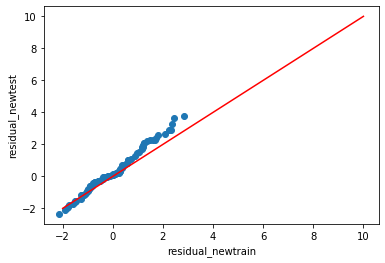

In [61]:
plt.figure()
plt.scatter(np.sort(residual_train3), np.sort(residual_test3))
plt.xlabel("residual_newtrain")
plt.ylabel("residual_newtest")
x = np.linspace(-2,10,100)
y=x
plt.plot(x,y,'-r')
plt.show()

In [62]:
residual_train3 = np.array(residual_train3)
residual_test3 = np.array(residual_test3)

In [63]:
chi2_contingency(pd.crosstab(residual_train3,residual_test3))

(8556.000000000002,
 0.23895120915323623,
 8464,
 array([[0.01075269, 0.01075269, 0.01075269, ..., 0.01075269, 0.01075269,
         0.01075269],
        [0.01075269, 0.01075269, 0.01075269, ..., 0.01075269, 0.01075269,
         0.01075269],
        [0.01075269, 0.01075269, 0.01075269, ..., 0.01075269, 0.01075269,
         0.01075269],
        ...,
        [0.01075269, 0.01075269, 0.01075269, ..., 0.01075269, 0.01075269,
         0.01075269],
        [0.01075269, 0.01075269, 0.01075269, ..., 0.01075269, 0.01075269,
         0.01075269],
        [0.01075269, 0.01075269, 0.01075269, ..., 0.01075269, 0.01075269,
         0.01075269]]))

In [64]:
ypred3 = model3.predict(X_test3)

In [65]:
r2_score(y_test3,ypred3)

0.9289808103328375

In [66]:
# two sample K-s test

In [67]:
from scipy.stats import ks_2samp

In [68]:
ks_2samp(residual_train,residual_test)   #model1

Ks_2sampResult(statistic=0.13, pvalue=0.36818778606286096)

In [69]:
ks_2samp(residual_train2,residual_test2)#model2

Ks_2sampResult(statistic=0.12121212121212122, pvalue=0.4630101136905197)

In [70]:
ks_2samp(residual_train3,residual_test3)#model3

Ks_2sampResult(statistic=0.11827956989247312, pvalue=0.535898476863694)

In [71]:
# so based on r square and 2 sample chi square test as well as 2 sample K-S test, we fail to reject the hypothesis which residual error of 
# training set and error of validation set are from same distribution so we can move on.


In [72]:
# final parameter we choose is (3.6557928921639267, array([0.04256215, 0.1954805 ])).

In [73]:
#3.2079910207355393, array([0.04457953, 0.19154688]

In [74]:
# (3.1469862518096257, array([0.04585391, 0.18412361]))

# get 95% Confidence Interval

In [75]:
#MPO is 50441.5266.

In [76]:
#calculate the profit in validation set

In [88]:
profit1 = [] 
for i in range(len(y_test.index)):
    pos = y_test.index[i]
    est = 0.5*9.92+0.2*49.6+(b0+b1*X_test.TV[pos]+b2*X_test.Radio[pos]+residual_test[i])
    profit1.append(est)

In [89]:
profit1

[31.453255945329765,
 37.92354617502721,
 35.789802151902876,
 30.039725147792506,
 34.94965628685115,
 31.707152795642617,
 20.317387596440632,
 20.874834091859714,
 17.22264390642063,
 34.70200143220208,
 31.501226722791692,
 35.53314840219663,
 28.8580446752672,
 32.081825519449076,
 30.97949450522711,
 28.349883011249837,
 27.005637100471688,
 19.075048147127056,
 30.389968703627176,
 22.245059890437524,
 28.501313825309964,
 23.889044368033083,
 31.00031874177003,
 30.00455974382692,
 34.41530375876074,
 22.916212118469318,
 29.614110528953063,
 19.728940105212576,
 34.72132039384681,
 21.358725580538188,
 34.22075802453079,
 33.8628047622238,
 26.26064271149506,
 34.06763451980735,
 27.972334082737568,
 31.31107996874654,
 28.383334544405812,
 36.11674908467275,
 25.055012081978674,
 33.59680253381157,
 23.265529688386835,
 32.77372999968833,
 33.521355830633624,
 22.465620219215033,
 24.046324217507028,
 24.440250139424535,
 32.68122612583707,
 36.12142959679553,
 28.59923297036

In [85]:
profit2 = []
for i in range(len(y_test.index)):
    pos = y_test.index[i]
    est = 0.5*9.92+0.2*49.6+(b0+b1*X_test.TV[pos]+b2*X_test.Radio[pos]+residual_test[i])/100
    profit1.append(est)

100    222.4
101    296.4
102    280.2
103    187.9
104    238.2
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 100, dtype: float64